In [1]:
import json
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt 
from pyvis.network import Network
from Modules.NetVisualizer.net_visualizer import *
from Modules.NetBuilder.net_builder import net_build
from Utils.scripts import *
import pandas as pd
from random import randint
import seaborn as sns
from wordcloud import WordCloud
import collections
import numpy as np
import plotly.express as px
import math


# Data Analysis
Uses DaScra output of Disability dataset

## Reading/Cleaning Data

In [2]:
data_to_read='./OutputFiles/whole_Disability_dascra_output.xlsx'

stories_df= pd.read_excel(data_to_read,
              dtype={
                  'AdditionalTags': str, 'ArchiveWarning': str,
                  'Author': str, 'Bookmarks': str,
                  'Category': str, 'Chapters': str,
                  'Characters': str, 'Comments': str,
                  'Fandom': str, 'Hits': int,
                  'Kudos': object, 'Language': str,
                  'Rating': str, 'Relationship': str,
                  'Series': str, 'Part': float,
                  'SourceURL': str, 'Title': str,
                  'Updated': str, 'Words': str,
              }) 


stories_df=stories_df.drop_duplicates()
# stories_df=stories_df.loc[stories_df.Language=='English']
stories_df=stories_df.drop(columns=['Comments','Hits','Kudos','SourceURL','ArchiveWarning','Bookmarks','Category','Characters','Language','Rating','Relationship','Updated','Words',])
# stories_df=stories_df[['Title', 'AdditionalTags']]


In [3]:
stories_df['Title']=stories_df['Title'].apply(lambda x: x.strip())

stories_df['AdditionalTags']=stories_df['AdditionalTags'].apply(lambda x: [item.strip() for item in str(x).split(',')])
all_additionaltags=[]
stories_df["AdditionalTags"].apply(lambda x: all_additionaltags.extend(x))
len(all_additionaltags)


stories_df['StoryTagCount']=stories_df["AdditionalTags"].apply(lambda x: len(x))

## Visualizations


### Story's tags count Histogram


In [4]:
Q1 = stories_df.StoryTagCount.quantile(0.25)
Q3 = stories_df.StoryTagCount.quantile(0.75)
IQR = Q3 - Q1
# Freedman Diaconis Estimator for number of bins
temp = (stories_df.StoryTagCount.max() - stories_df.StoryTagCount.min())
bin_width= 2*IQR*temp**(-1/3)
nbins = math.ceil(temp / bin_width)

fig = px.histogram(stories_df, x="StoryTagCount", nbins=nbins)
fig.update_layout(bargap=0.2)
fig.show()

In [5]:
a= collections.Counter(all_additionaltags)
print(len(a))
[a.pop(key) for key in a.copy() if a[key]<=1000].__len__()
print(len(a))

177777
47


### Individual Tags Count


In [6]:
fig = px.bar(x=list(a.keys()), y=list(a.values()))
# fig.
fig.update_layout(xaxis={'categoryorder':'total descending'}) 
fig.show()

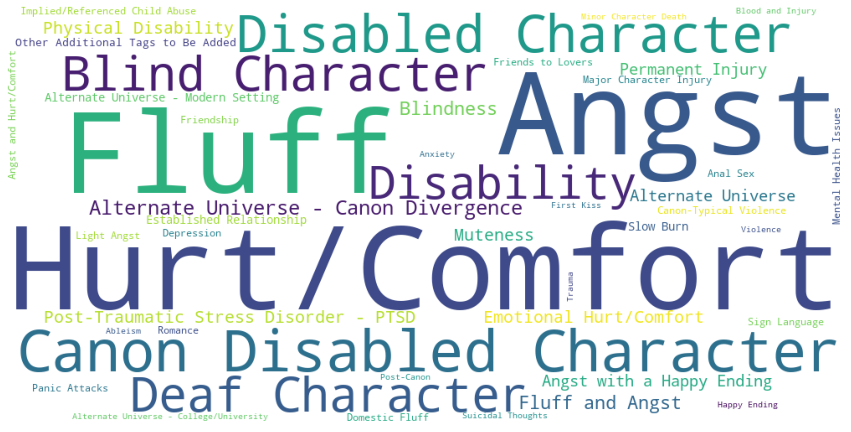

In [7]:
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate_from_frequencies(a)

plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud)

# Disability RATAS

In [8]:
disability_ratas = read_json_rata('./OutputFiles/disability_rata_database/disability_rata_current.json')
disability_ratas =  nx.DiGraph(disability_ratas[0])

In [9]:
stories_df["DisabilityTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item)])
stories_df["DisabilityTagsCount"]=stories_df.DisabilityTags.apply(len)

stories_df["NonDisabilityTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if not disability_ratas.has_node(item)])
stories_df["NonDisabilityTagsCount"]=stories_df.NonDisabilityTags.apply(len)


stories_df["DisabilityCanocicalTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='canonical_tag'])
stories_df["DisabilityCanonicalTagsCount"]=stories_df.DisabilityCanocicalTags.apply(len)
stories_df["DisabilitySynTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='synned_tag'])
stories_df["DisabilitySynTagsCount"]=stories_df.DisabilitySynTags.apply(len)


In [10]:
fig = px.histogram(stories_df.DisabilityTagsCount,x='DisabilityTagsCount')
fig.update_layout(bargap=0.2)
fig.show()

In [11]:
print(len(all_additionaltags))

688469


In [12]:
add_tags= list(set(all_additionaltags))
disability_tags=[tag for tag in add_tags if disability_ratas.has_node(tag)]
len(disability_tags)

649

In [13]:
net_visualize(disability_ratas,False)

<class 'pyvis.network.Network'> |N|=783 |E|=804

In [14]:
G= disability_ratas.copy()

for item in G.nodes:
    G.nodes[item]['color']='#2E86C1' if item in disability_tags else  '#F39C12'

In [15]:
net_visualize(G,False)


<class 'pyvis.network.Network'> |N|=783 |E|=804